In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [24]:
df = pd.read_csv("dataset.csv")

In [39]:
import matplotlib as mlp

mlp.rcParams['lines.linewidth'] = 3
mlp.rcParams['xtick.major.size'] = 10
mlp.rcParams['xtick.major.width'] = 3
mlp.rcParams['xtick.labelsize'] = 10
mlp.rcParams['xtick.color'] = 'blue'

mlp.rcParams['ytick.major.size'] = 10
mlp.rcParams['ytick.major.width'] = 3
mlp.rcParams['ytick.labelsize'] = 10
mlp.rcParams['ytick.color'] = '#FF5533'

mlp.rcParams['axes.labelsize'] = 10
mlp.rcParams['axes.titlesize'] = 10
mlp.rcParams['axes.titlecolor'] = '#00B050'
mlp.rcParams['axes.labelcolor'] = '#00B050'


In [25]:
df

,Количество комнат,Площадь,Этаж,Лифт,Цена. тыс.руб
0,4,71,9,Есть,3600
1,3,66,1,Нет,3300
2,2,42,3,Нет,2100
3,2,48,4,Нет,2350
4,1,25,4,Нет,1250
5,1,36,3,Есть,2250
6,3,89,1,Есть,4900
7,4,72,7,Есть,3250


In [26]:
df.describe()

,Количество комнат,Площадь,Этаж,Цена. тыс.руб
count,8.000000,8.000000,8.00000,8.000000
mean,2.500000,56.125000,4.00000,2875.000000
std,1.195229,21.682366,2.77746,1124.722188
min,1.000000,25.000000,1.00000,1250.000000
25%,1.750000,40.500000,2.50000,2212.500000
50%,2.500000,57.000000,3.50000,2800.000000
75%,3.250000,71.250000,4.75000,3375.000000
max,4.000000,89.000000,9.00000,4900.000000


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Количество комнат  8 non-null      int64 
 1    Площадь           8 non-null      int64 
 2    Этаж              8 non-null      int64 
 3    Лифт              8 non-null      object
 4    Цена. тыс.руб     8 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 448.0+ bytes


In [28]:
df.columns

Index(['Количество комнат', ' Площадь', ' Этаж', ' Лифт', ' Цена. тыс.руб'], dtype='object')

Видим, что названия колонок имеют пробелы, слова начинаются с заглавных букв. Исправим это

In [29]:
cols = df.columns

for col in cols:
    df.rename(columns={col:col.lower().strip().replace(" ", '_').replace('.', '')}, inplace = True)

In [30]:
df.rename(columns={'цена_тысруб':"цена"}, inplace = True)

In [31]:
df

,количество_комнат,площадь,этаж,лифт,цена
0,4,71,9,Есть,3600
1,3,66,1,Нет,3300
2,2,42,3,Нет,2100
3,2,48,4,Нет,2350
4,1,25,4,Нет,1250
5,1,36,3,Есть,2250
6,3,89,1,Есть,4900
7,4,72,7,Есть,3250


Преобразуем признак "Лифт" в бинарный вид, в численное множество {0,1}

In [32]:
df['лифт'] = [1 if x == 'Есть' else 0 for x in df['лифт']]

In [34]:
df

,количество_комнат,площадь,этаж,лифт,цена
0,4,71,9,1,3600
1,3,66,1,0,3300
2,2,42,3,0,2100
3,2,48,4,0,2350
4,1,25,4,0,1250
5,1,36,3,1,2250
6,3,89,1,1,4900
7,4,72,7,1,3250


Отлично! Теперь попробуем визуализировать данные и выявить зависимости между целевой переменной и признаками в отдельности

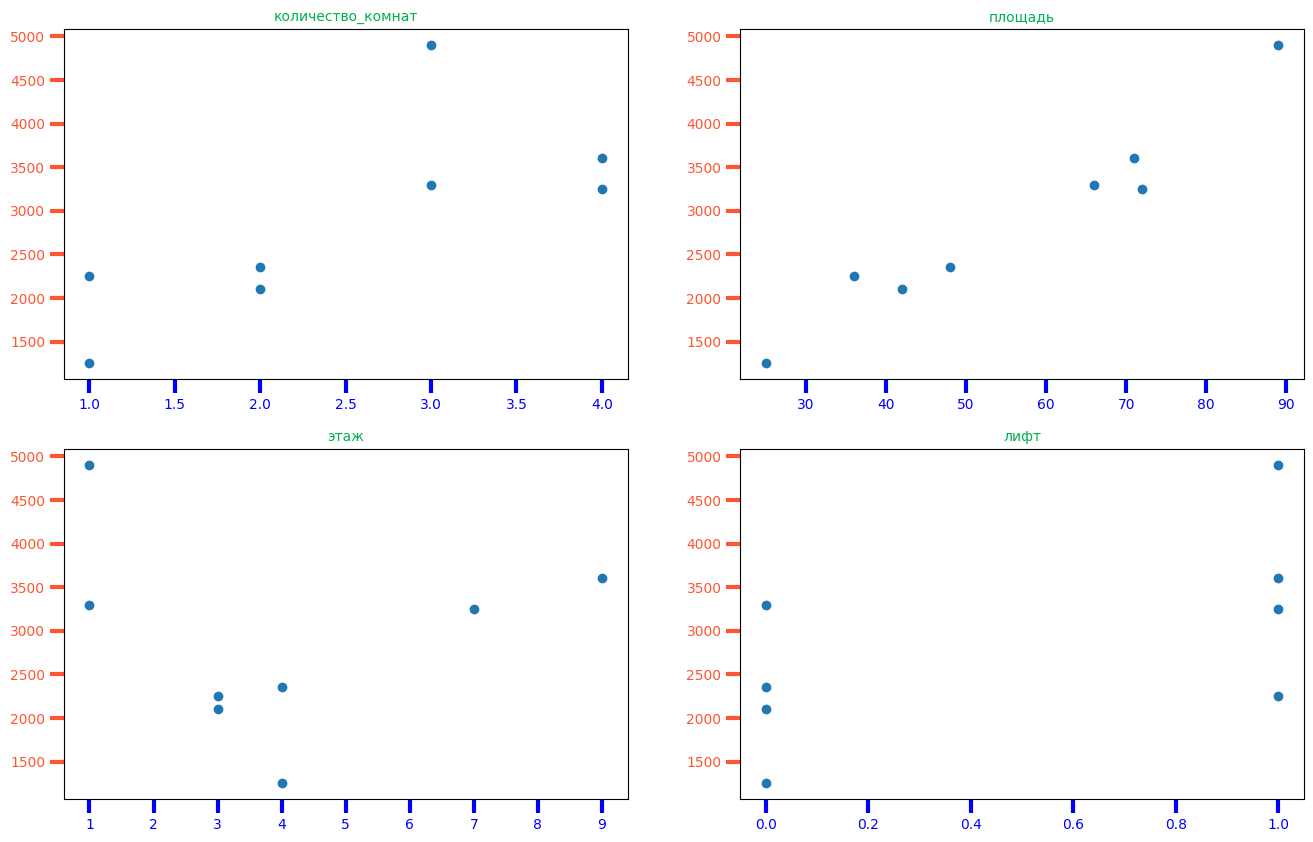

In [40]:
fig = plt.figure()

fig.set_size_inches(16, 10)
i = 1
cols = df.columns
cols = list(cols)
cols.remove('цена')
for col in cols:
    ax = fig.add_subplot(2,2,i)
    ax.set_title(col)
    plt.scatter(df[col], df['цена'])
    i += 1
plt.show()

## Выводы

Отсюда наблюдаем около-линейную зависимость цена от количества комнат и площади.

Квартиры в домах, где есть лифт, в среднем стоят дороже.

Зависимость от этажа проследить не удалось

In [43]:
df

,количество_комнат,площадь,этаж,лифт,цена
0,4,71,9,1,3600
1,3,66,1,0,3300
2,2,42,3,0,2100
3,2,48,4,0,2350
4,1,25,4,0,1250
5,1,36,3,1,2250
6,3,89,1,1,4900
7,4,72,7,1,3250


## Далее попробуем обучить несколько алгоритмов машинного обучения

In [44]:
from sklearn.linear_model import Lasso, Ridge, LinearRegression

In [47]:
model_1 = Lasso()
model_2 = Ridge()
model_3 = LinearRegression()

models = [model_1,model_2,model_3]

In [48]:
X = df.drop('цена', axis = 1)
Y = df['цена']

In [49]:
models_name = ["Lasso", 'Ridge', 'LinearRegression']
for model, name in zip(models,models_name):
    model.fit(X,Y)
    X['prediction_'+name] = model.predict(X)

In [50]:
X

,количество_комнат,площадь,этаж,лифт,prediction_Lasso,prediction_Ridge,prediction_LinearRegression
0,4,71,9,1,3410.715137,3411.938217,3412.460159
1,3,66,1,0,3234.009186,3227.852073,3226.954019
2,2,42,3,0,2042.124216,2038.708660,2038.308749
3,2,48,4,0,2431.649443,2431.644133,2433.545079
4,1,25,4,0,1300.217154,1300.501873,1301.192153
5,1,36,3,1,2199.668401,2204.825285,2203.487263
6,3,89,1,1,4910.448645,4914.590389,4915.300077
7,4,72,7,1,3471.167817,3469.939370,3468.752502


# Посчитаем метрику MAE для трех моделей

In [53]:
abs(Y - X['prediction_Lasso']).mean()

90.87076492639986

In [54]:
abs(Y - X['prediction_Ridge']).mean()

91.66894113163738

In [55]:
abs(Y - X['prediction_LinearRegression']).mean()

92.19745262272988

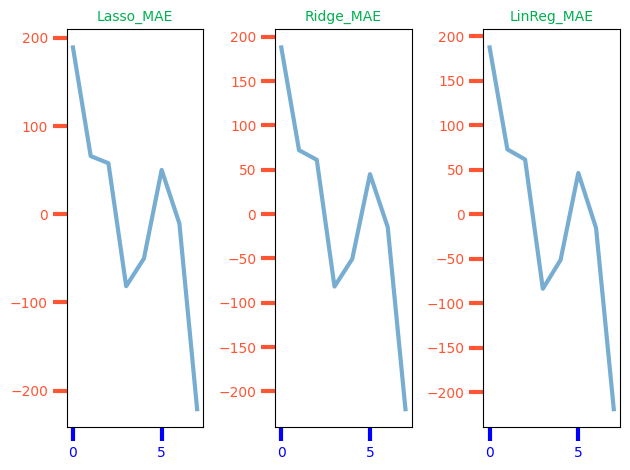

In [58]:
fig, ax = plt.subplots(ncols = 3)
dct = {'Lasso': Y - X['prediction_Lasso'], 'Ridge': Y - X['prediction_Ridge'], 'LinReg': Y - X['prediction_LinearRegression']}

i = 0
for key,val in dct.items():
    ax[i].plot(np.arange(X.shape[0]), val, alpha = 0.6)
    ax[i].set_title(key + '_MAE')
    i += 1

plt.tight_layout()
plt.show()

Наблюдаем для трех моделей в среднем ошибку в 91 тыс. руб. Наилучший результат получаем с использованием модели Lasso с L1-регуляризацией. Ее и будем использовать